In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model20_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.MaxPool2d, pool2 = None),
    post_conv=post_conv0,
)
he_initialization(model20_0)
describe(model20_0)

MACs: 29.51 MMac, Params: 8.25 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-4              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-5             [1, 10, 

Loading checkpoint from model_weights/model20_0.pt
Starting
Epoch 1/10: Train loss = 0.5934, Train accuracy = 0.6753, Test loss = 0.5951, Test accuracy = 0.6693


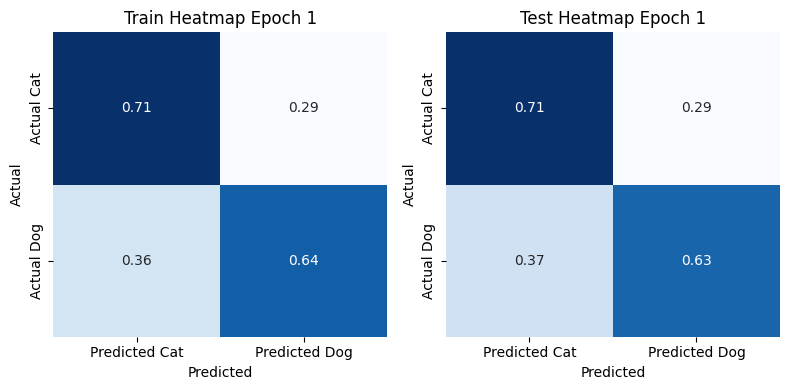

Epoch 2/10: Train loss = 0.5811, Train accuracy = 0.6859, Test loss = 0.5919, Test accuracy = 0.6868


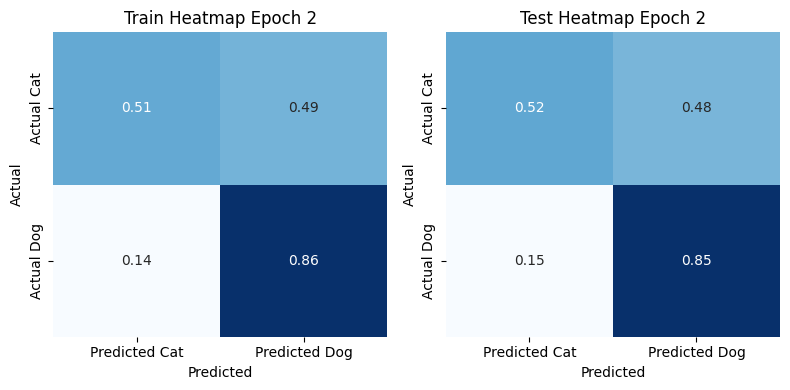

Epoch 3/10: Train loss = 0.4905, Train accuracy = 0.7640, Test loss = 0.4999, Test accuracy = 0.7602


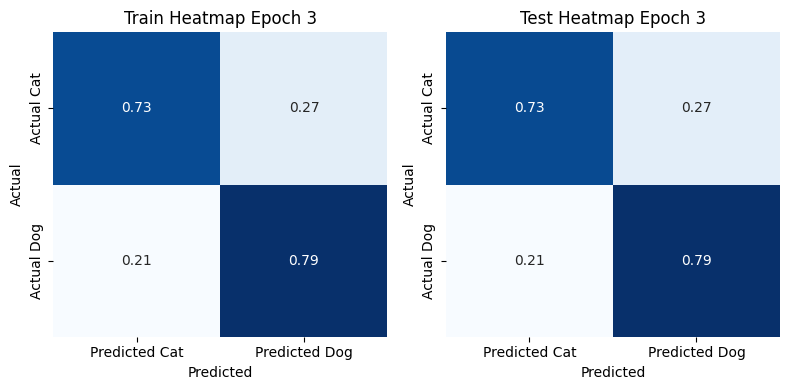

Epoch 4/10: Train loss = 0.4629, Train accuracy = 0.7812, Test loss = 0.4817, Test accuracy = 0.7683


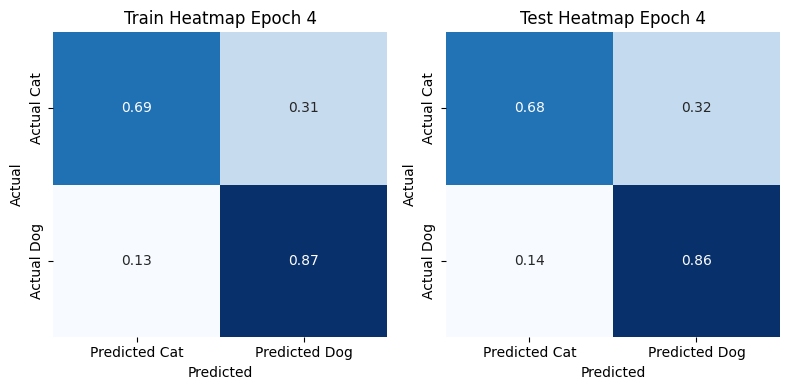

Epoch 5/10: Train loss = 0.4189, Train accuracy = 0.8064, Test loss = 0.4428, Test accuracy = 0.7919


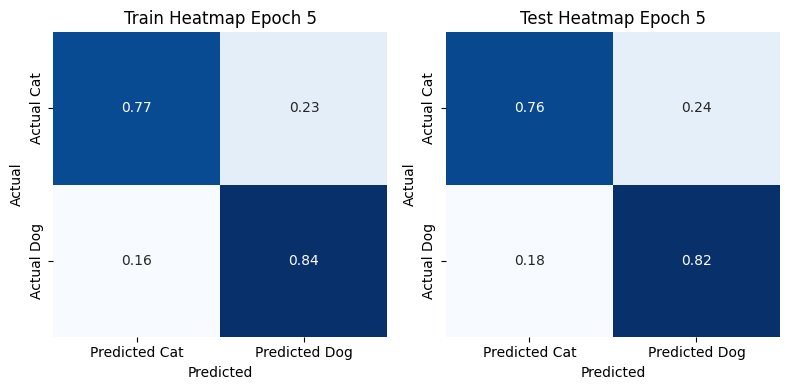

Epoch 6/10: Train loss = 0.3775, Train accuracy = 0.8306, Test loss = 0.4204, Test accuracy = 0.8120


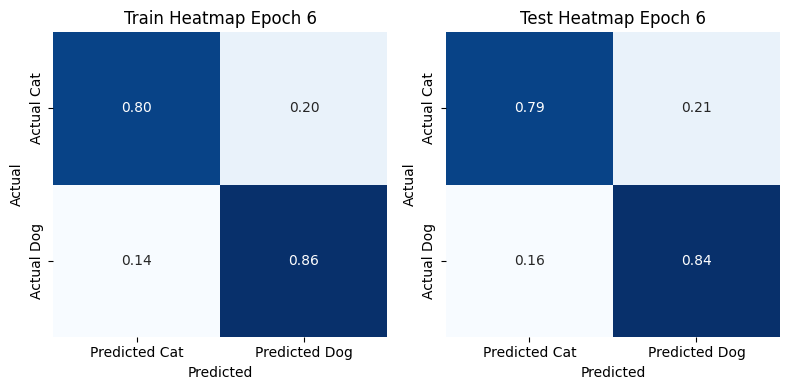

Epoch 7/10: Train loss = 0.3590, Train accuracy = 0.8433, Test loss = 0.3978, Test accuracy = 0.8191


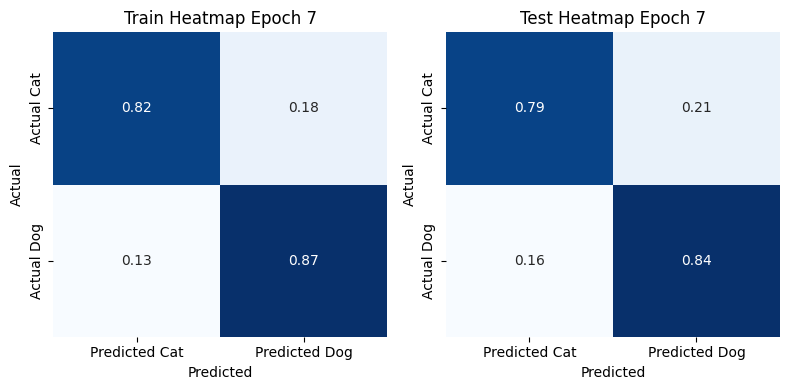

Epoch 8/10: Train loss = 0.3395, Train accuracy = 0.8503, Test loss = 0.3893, Test accuracy = 0.8298


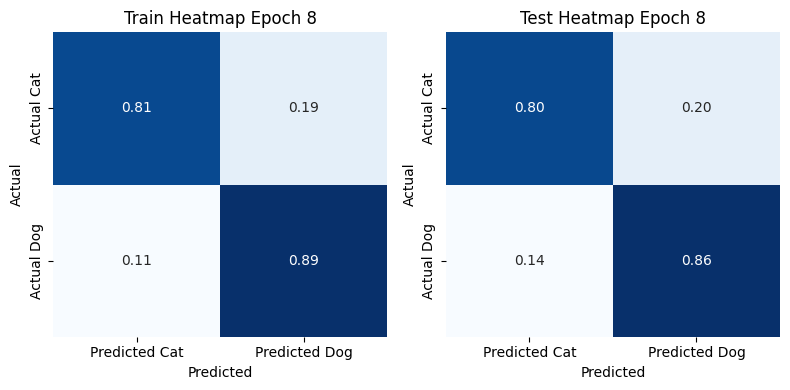

Epoch 9/10: Train loss = 0.3351, Train accuracy = 0.8533, Test loss = 0.3903, Test accuracy = 0.8278


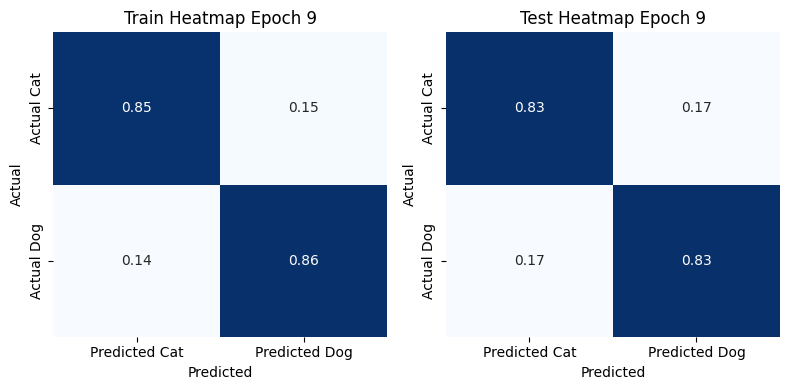

Epoch 10/10: Train loss = 0.3311, Train accuracy = 0.8555, Test loss = 0.3841, Test accuracy = 0.8289


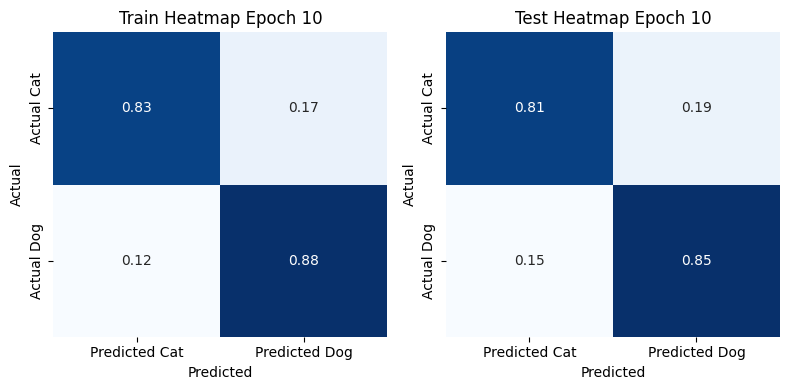

Training complete.


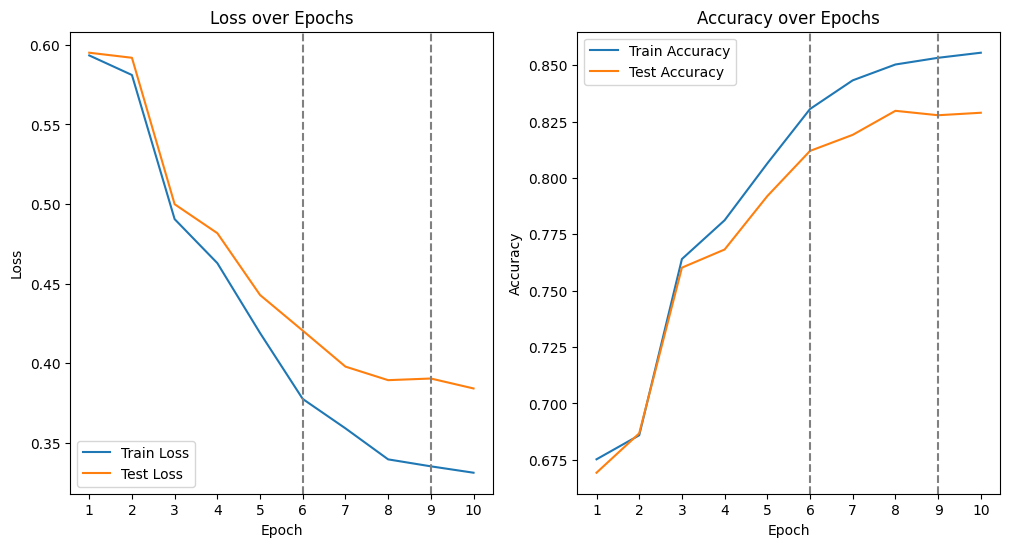

In [5]:
train(model20_0,"model_weights/model20_0.pt",criterion,train_dataset,test_dataset)